In [1]:
!pip install pandas

import pandas as pd


In [2]:
 !conda install -c conda-forge fbprophet --yes
    

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [13]:
data = pd.read_csv("FB (2).csv")    #predictive model file, data taken from 01/20/2016 - 01/20/2020
data2 = pd.read_csv("FB (1).csv")   #actual model file, data taken from 01/20/2020 - 09/05/2020

from fbprophet.plot import plot_plotly, plot_components_plotly

data=data.rename(columns={'Date':'ds', 'Close':'y'})
data2=data2.rename(columns={'Date':'ds', 'Close':'y'})

In [14]:
data.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,96.529999,98.070000,89.370003,97.940002,97.940002,151064000
1,2016-01-25,98.720001,112.839996,94.230003,112.209999,112.209999,288273300
2,2016-02-01,112.269997,117.589996,103.180000,104.070000,104.070000,278615500
3,2016-02-08,100.410004,105.110001,96.820000,102.010002,102.010002,258965500
4,2016-02-15,103.800003,106.000000,100.239998,104.570000,104.570000,151758600


In [25]:
m = Prophet(yearly_seasonality = True)
m.fit(data)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods = 228)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,242.811388,228.643953,256.242913
433,2020-08-25,242.974172,228.926607,256.234993
434,2020-08-26,243.133121,230.550025,256.410421
435,2020-08-27,243.285825,228.966303,257.007089
436,2020-08-28,243.430042,229.529342,256.902931


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

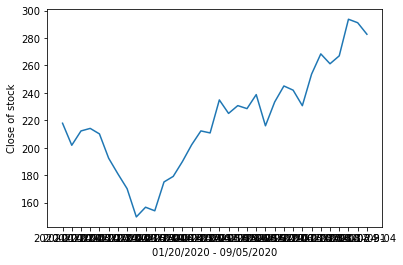

In [27]:
import matplotlib.pyplot as plt

plt.plot(data2.ds,data2.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

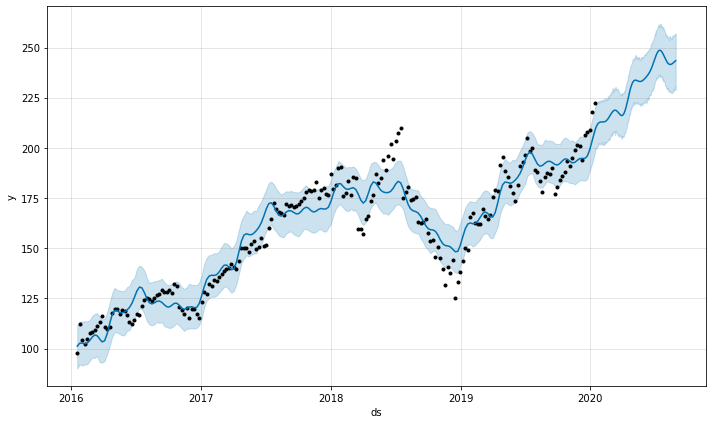

In [28]:
fig1 = m.plot(forecast)

In [29]:
data2.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,268.040009,273.859985,255.130005,261.239990,261.239990,112082100
30,2020-08-17,262.500000,270.489990,259.260010,267.010010,267.010010,91171300
31,2020-08-24,271.070007,304.670013,268.769989,293.660004,293.660004,182301700
32,2020-08-31,293.950012,303.600006,283.630005,291.119995,291.119995,91206100
33,2020-09-04,287.250000,289.000000,271.140015,282.730011,282.730011,29809863


In [30]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,241.127544,228.643953,256.242913,232.786960,248.760240,1.683844,1.683844,1.683844,1.683844,1.683844,1.683844,0.0,0.0,0.0,242.811388
433,2020-08-25,241.266375,228.926607,256.234993,232.883028,248.940018,1.707797,1.707797,1.707797,1.707797,1.707797,1.707797,0.0,0.0,0.0,242.974172
434,2020-08-26,241.405206,230.550025,256.410421,232.981080,249.119301,1.727915,1.727915,1.727915,1.727915,1.727915,1.727915,0.0,0.0,0.0,243.133121
435,2020-08-27,241.544037,228.966303,257.007089,233.080065,249.300451,1.741788,1.741788,1.741788,1.741788,1.741788,1.741788,0.0,0.0,0.0,243.285825
436,2020-08-28,241.682868,229.529342,256.902931,233.179050,249.492261,1.747175,1.747175,1.747175,1.747175,1.747175,1.747175,0.0,0.0,0.0,243.430042


In [1]:
fb_impact = (282.730011-243.430042)/243.430042 * 100
print("Facebook's stocks have been impacted against the normal flow by Covid-19(from when the first case was reported in the USA) by\n",fb_impact,"%")


Facebook's stocks have been impacted against the normal flow by Covid-19(from when the first case was reported in the USA) by
 16.144255933702713 %
